In [1]:
# Bismillah

# Tanda-tanda orang akan canceled booking hotel atau tidak
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel = pd.read_csv('hotel_bookings.csv', usecols = ['hotel', 'is_canceled','adults','children','babies',
                                                     'meal','country','market_segment','distribution_channel',
                                                    'reserved_room_type', 'booking_changes', 'deposit_type', 
                                                     'customer_type', 'total_of_special_requests'])
hotel.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,customer_type,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,Transient,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,Transient,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,Transient,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,Transient,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,Transient,1


In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   adults                     119390 non-null  int64  
 3   children                   119386 non-null  float64
 4   babies                     119390 non-null  int64  
 5   meal                       119390 non-null  object 
 6   country                    118902 non-null  object 
 7   market_segment             119390 non-null  object 
 8   distribution_channel       119390 non-null  object 
 9   reserved_room_type         119390 non-null  object 
 10  booking_changes            119390 non-null  int64  
 11  deposit_type               119390 non-null  object 
 12  customer_type              119390 non-null  object 
 13  total_of_special_requests  11

In [4]:
hotel.describe(include = 'all') #untuk numerik & kategorikal ditampilkan semua

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,customer_type,total_of_special_requests
count,119390,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390,119390.000000,119390,119390,119390.000000
unique,2,NaN,NaN,NaN,NaN,5,177,8,5,10,NaN,3,4,NaN
top,City Hotel,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,NaN,No Deposit,Transient,NaN
freq,79330,NaN,NaN,NaN,NaN,92310,48590,56477,97870,85994,NaN,104641,89613,NaN
mean,NaN,0.370416,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,NaN,0.221124,NaN,NaN,0.571363
std,NaN,0.482918,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,NaN,0.652306,NaN,NaN,0.792798
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
50%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
75%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000


# EDA

In [5]:
eda_hotel = hotel.copy()
eda_hotel['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Cancelation Situation')

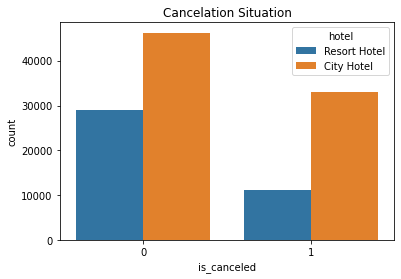

In [6]:
# Hotel Type vs Cancelation Situation
sns.countplot(x = 'is_canceled', hue = 'hotel', data = eda_hotel)
plt.title ('Cancelation Situation')

Text(0.5, 1.0, 'Deposit Type')

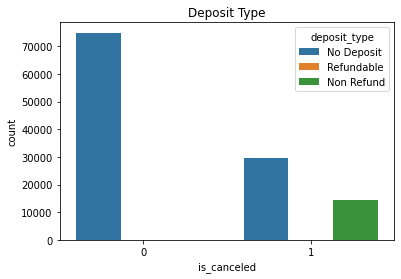

In [7]:
sns.countplot(x = 'is_canceled', hue = 'deposit_type', data = eda_hotel)
plt.title ('Deposit Type')

Text(0.5, 1.0, 'Customer Type')

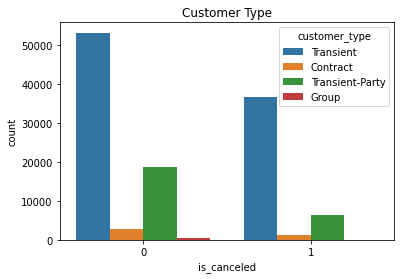

In [8]:
sns.countplot(x = 'is_canceled', hue = 'customer_type', data = eda_hotel)
plt.title ('Customer Type')

Text(0.5, 1.0, 'Meal Type')

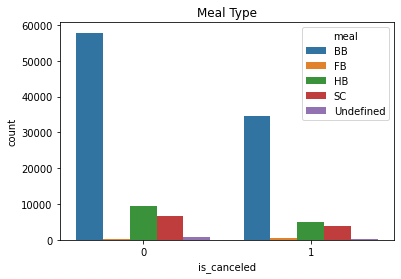

In [9]:
sns.countplot(x = 'is_canceled', hue = 'meal', data = eda_hotel)
plt.title ('Meal Type')

In [10]:
# Hubungan adults dengan children
eda_hotel['all_child'] = eda_hotel['children'] + eda_hotel['babies']
pd.crosstab(eda_hotel['adults'], eda_hotel['all_child'], margins = True, margins_name = 'Total')

all_child,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81557,4658,3369,91,0,2,89677
3,5665,495,41,0,0,0,6201
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


# Data Cleaning

In [11]:
hotel.isna().sum()/len(hotel)*100

hotel                        0.000000
is_canceled                  0.000000
adults                       0.000000
children                     0.003350
babies                       0.000000
meal                         0.000000
country                      0.408744
market_segment               0.000000
distribution_channel         0.000000
reserved_room_type           0.000000
booking_changes              0.000000
deposit_type                 0.000000
customer_type                0.000000
total_of_special_requests    0.000000
dtype: float64

In [12]:
hotel['is_canceled'].value_counts()/hotel.shape[0]*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

Data ini imbalance, karena tidak seimbang antara cancel atau tidak. Dan banyak yang valuenya 0 juga.

In [13]:
hotel.describe(include = 'all')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,customer_type,total_of_special_requests
count,119390,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390,119390.000000,119390,119390,119390.000000
unique,2,NaN,NaN,NaN,NaN,5,177,8,5,10,NaN,3,4,NaN
top,City Hotel,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,NaN,No Deposit,Transient,NaN
freq,79330,NaN,NaN,NaN,NaN,92310,48590,56477,97870,85994,NaN,104641,89613,NaN
mean,NaN,0.370416,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,NaN,0.221124,NaN,NaN,0.571363
std,NaN,0.482918,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,NaN,0.652306,NaN,NaN,0.792798
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
50%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
75%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000


### Preprocessing Scheme

- Target : is_canceled
- OneHotEncoding : hotel, meal, distribution_channel, deposit_type, customer_type
- BinaryEncoder : country, market_segment, reserved_room_type

Mengisi missing value
- Imputer (Simple Imputer, Iterative Imputer, KNN (membaca pola dari tetangga terdekat))
- Iterative Imputer (mengisi Nan menggunakan algoritma regression, menginput sesuai dengan datanya) : children
- Simple Imputer mode (modus) : country


- Standard scaler : adults
- passthrough : babies, booking_changes, total_of_special_requests

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from category_encoders import BinaryEncoder

In [15]:
mode_binary = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('binary', BinaryEncoder())
])

transformer = ColumnTransformer ([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), ['hotel', 'meal', 'distribution_channel',
                                                          'deposit_type', 'customer_type']),
    ('mode binary', mode_binary, ['country', 'market_segment', 'reserved_room_type']),
    ('iterative', IterativeImputer(max_iter = 5), ['children']),
    ('scaler', StandardScaler(), ['adults'])
], remainder = 'passthrough')

*Define Target Data*

In [74]:
X_train.columns
# hotel

Index(['hotel', 'adults', 'children', 'babies', 'meal', 'country',
       'market_segment', 'distribution_channel', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'customer_type',
       'total_of_special_requests'],
      dtype='object')

In [16]:
X = hotel.drop('is_canceled', axis = 1)
y = hotel['is_canceled']

- 0 = Not Canceled
- 1 = Canceled

- TN
- TP
- FP : Prediksi Cancel, Actual Not Cancel (recall = TP/(FN+TP))
- FN : Prediksi Not Cancel, Actual Cancel (precision = TP/(FN+TP))

f1-score : (2x precission x recall)/(precission x recall)

    - membiarkan FP resikonya apa? Kehilangan kepercayaan customer, 
    - membiarkan FN resikonya apa? Banyak kamar yang kosong
    
    - mana yang lebih rugi? membiarkan FP (no business without customer)
    - mana yg ditekan? FP

Splitting Data

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 2022
                                                   )

## Modeling

- Logistic Regression
- Decision Tree

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [20]:
logreg = LogisticRegression(random_state = 2022)
tree = DecisionTreeClassifier (random_state = 2022)

- Buat Pipeline


In [21]:
logreg_pipe = Pipeline ([
    ('transformer', transformer),
    ('model', logreg)
])

tree_pipe = Pipeline ([
    ('transformer', transformer),
    ('model', tree)
])

In [22]:
def model_eval (model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5),
                              scoring = metric)
    return model_cv

In [23]:
logreg_pipe_cv = model_eval(logreg_pipe, 'f1')
tree_pipe_cv = model_eval(tree_pipe, 'f1')

In [24]:
score_cv = [logreg_pipe_cv, tree_pipe_cv]
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std()]

Fitting, menggunakan for loop (supaya bisa dipakai berulang-ulang)
balikin lagi ke pipelinenya

In [25]:
for model in [logreg_pipe, tree_pipe]:
    model.fit (X_train, y_train)

In [26]:
score_f1 = [f1_score(y_test, logreg_pipe.predict(X_test)),
           f1_score(y_test, tree_pipe.predict(X_test)),
           ]

In [27]:
model_name = ['Logistic Regression', 'Decision Tree']
model_summary = pd.DataFrame({
    'model' : model_name,
    'cv' : score_cv,
    'mean' : score_mean,
    'std' : score_std,
    'f1' : score_f1
})
model_summary

,model,cv,mean,std,f1
0,Logistic Regression,"[0.6056667533142709, 0.6019215788106985, 0.596...",0.603430,0.004680,0.601824
1,Decision Tree,"[0.7149973975760279, 0.7159728373191615, 0.708...",0.712903,0.003088,0.715711


## Handling Imbalance

In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline # beda Pipeline dari sklearn dan dari imblearn (imbalance)

- Resampling : Under Sampling

In [29]:
rus = RandomUnderSampler(random_state = 2022)
X_under, y_under = rus.fit_resample(X_train, y_train)

In [30]:
logreg_rus_pipe = Pipeline ([
    ('transformer', transformer),
    ('rus',rus),
    ('model', logreg)
])

tree_rus_pipe = Pipeline ([
    ('transformer', transformer),
    ('rus',rus),
    ('model', tree)
])

In [31]:
def model_eval (model, metric):
    model_cv = cross_val_score(model, X_under, y_under, cv = StratifiedKFold(n_splits = 5),
                              scoring = metric)
    return model_cv

In [32]:
logreg_rus_pipe_cv = model_eval(logreg_rus_pipe, 'f1')
tree_rus_pipe_cv = model_eval(tree_rus_pipe, 'f1')

In [33]:
score_cv = [logreg_rus_pipe_cv, tree_rus_pipe_cv]
score_mean = [logreg_rus_pipe_cv.mean(), tree_rus_pipe_cv.mean()]
score_std = [logreg_rus_pipe_cv.std(), tree_rus_pipe_cv.std()]

In [34]:
for model in [logreg_rus_pipe, tree_rus_pipe]:
    model.fit (X_under, y_under)

In [35]:
score_f1 = [f1_score(y_test, logreg_rus_pipe.predict(X_test)),
           f1_score(y_test, tree_rus_pipe.predict(X_test)),
           ]

In [36]:
model_name_rus = ['Logistic Regression Under', 'Decision Tree Under']
rus_summary = pd.DataFrame({
    'model' : model_name_rus,
    'cv' : score_cv,
    'mean' : score_mean,
    'std' : score_std,
    'f1' : score_f1
})
rus_summary

,model,cv,mean,std,f1
0,Logistic Regression Under,"[0.7244247920257814, 0.7231117824773413, 0.720...",0.724872,0.002909,0.680197
1,Decision Tree Under,"[0.7796633941093969, 0.7851778376080486, 0.780...",0.782308,0.002512,0.728100


- Resampling : Over Sampling

In [37]:
ros = RandomOverSampler(random_state = 2022)
X_over, y_over = ros.fit_resample(X_train, y_train)

In [38]:
logreg_ros_pipe = Pipeline ([
    ('transformer', transformer),
    ('ros',ros),
    ('model', logreg)
])

tree_ros_pipe = Pipeline ([
    ('transformer', transformer),
    ('ros',ros),
    ('model', tree)
])

In [39]:
def model_eval (model, metric):
    model_cv = cross_val_score(model, X_over, y_over, cv = StratifiedKFold(n_splits = 5),
                              scoring = metric)
    return model_cv

In [40]:
logreg_ros_pipe_cv = model_eval(logreg_ros_pipe, 'f1')
tree_ros_pipe_cv = model_eval(tree_ros_pipe, 'f1')

In [41]:
score_cv = [logreg_ros_pipe_cv, tree_ros_pipe_cv]
score_mean = [logreg_ros_pipe_cv.mean(), tree_ros_pipe_cv.mean()]
score_std = [logreg_ros_pipe_cv.std(), tree_ros_pipe_cv.std()]

In [42]:
for model in [logreg_ros_pipe, tree_ros_pipe]:
    model.fit (X_over, y_over)

In [43]:
score_f1 = [f1_score(y_test, logreg_ros_pipe.predict(X_test)),
           f1_score(y_test, tree_ros_pipe.predict(X_test)),
           ]

In [44]:
model_name_ros = ['Logistic Regression Over', 'Decision Tree Over']
ros_summary = pd.DataFrame({
    'model' : model_name_ros,
    'cv' : score_cv,
    'mean' : score_mean,
    'std' : score_std,
    'f1' : score_f1
})

In [45]:
display (model_summary)
display (rus_summary)
display (ros_summary)

,model,cv,mean,std,f1
0,Logistic Regression,"[0.6056667533142709, 0.6019215788106985, 0.596...",0.603430,0.004680,0.601824
1,Decision Tree,"[0.7149973975760279, 0.7159728373191615, 0.708...",0.712903,0.003088,0.715711


,model,cv,mean,std,f1
0,Logistic Regression Under,"[0.7244247920257814, 0.7231117824773413, 0.720...",0.724872,0.002909,0.680197
1,Decision Tree Under,"[0.7796633941093969, 0.7851778376080486, 0.780...",0.782308,0.002512,0.728100


,model,cv,mean,std,f1
0,Logistic Regression Over,"[0.7228576456097132, 0.719023307436182, 0.7222...",0.721365,0.001370,0.675128
1,Decision Tree Over,"[0.8018440767267639, 0.7981764415968458, 0.798...",0.805609,0.007693,0.730001


# Ensemble

- Voting Clasifier

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:
vc = VotingClassifier([('model1', logreg_pipe), ('model2', tree_pipe)])

In [48]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              Pipeline(steps=[('transformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('one '
                                                                                'hot',
                                                                                OneHotEncoder(handle_unknown='ignore'),
                                                                                ['hotel',
                                                                                 'meal',
                                                                                 'distribution_channel',
                                                                                 'deposit_type',
                                                                                 'customer_type']),
                                 

In [49]:
score_vote = [f1_score(y_test, vc.predict(X_test))]
score_vote

[0.5881558207610899]

Karena scorenya turun, maka
'Voting Classifier tidak cocok untuk menangani Hotel booking demand'

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(random_state = 2022)

In [52]:
rf_pipe = Pipeline ([
    ('transformer', transformer),
    ('model', rf)
])

In [53]:
rf_pipe_cv = model_eval(rf_pipe, 'f1')

In [54]:
rf_pipe.fit(X_train, y_train)
score_rf = [f1_score(y_test, rf_pipe.predict(X_test))]
score_rf

[0.724264705882353]

## Hyperparameter tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
estimator = Pipeline ([
    ('transformer', transformer),
    ('ros', ros),
    ('model', tree)
    
])

hyperparam_space = {
    'ros__sampling_strategy' : ['minority', 'not minority'],
    'model__criterion' : ['gini', 'entropy'],
    'model__splitter' : ['best', 'random'],
    'model__max_depth' : [3, 5, 7, 9],
    'model__random_state' : [2022]
}

In [57]:
random = RandomizedSearchCV(
            estimator,
            param_distributions = hyperparam_space,
            cv = StratifiedKFold(n_splits = 5),
            scoring = 'f1',
            n_iter = 10,
            n_jobs = -1)

random.fit(X_train, y_train)

print ('best score', random.best_score_)
print ('best_param', random.best_params_)

best score 0.7134296496195666
best_param {'ros__sampling_strategy': 'minority', 'model__splitter': 'best', 'model__random_state': 2022, 'model__max_depth': 9, 'model__criterion': 'gini'}


## Before dan After Tuning

In [58]:
estimator.fit(X_train, y_train)
y_pred_estimator = estimator.predict(X_test)
before = f1_score(y_test, y_pred_estimator)

random.best_estimator_.fit(X_train, y_train)
y_predict = random.best_estimator_.predict(X_test)
after = f1_score(y_test, y_predict)

In [59]:
score_list = [before, after]
model_tuning = ['Tree before Tuning', 'Tree after Tuning']
best_summary = pd.DataFrame({
    'model' : model_tuning,
    'score' : score_list
})
best_summary

,model,score
0,Tree before Tuning,0.730039
1,Tree after Tuning,0.714003


## Feature Selection

In [60]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['hotel', 'meal', 'distribution_channel',
                                  'deposit_type', 'customer_type']),
                                ('mode binary',
                                 Pipeline(steps=[('encoder',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', BinaryEncoder())]),
                                 ['country', 'market_segment',
                                  'reserved_room_type']),
                                ('iterative', IterativeImputer(max_iter=5),
                                 ['children']),
                                ('scaler', StandardScaler(), ['adults'])])

In [73]:
print(transformer.transformers_[0][1].get_feature_names())
print(transformer.transformers_[1][1][1].get_feature_names())
print(transformer.transformers_[2][2])
print(transformer.transformers_[3][2])

['x0_City Hotel' 'x0_Resort Hotel' 'x1_BB' 'x1_FB' 'x1_HB' 'x1_SC'
 'x1_Undefined' 'x2_Corporate' 'x2_Direct' 'x2_GDS' 'x2_TA/TO'
 'x2_Undefined' 'x3_No Deposit' 'x3_Non Refund' 'x3_Refundable'
 'x4_Contract' 'x4_Group' 'x4_Transient' 'x4_Transient-Party']
['0_0', '0_1', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '1_0', '1_1', '1_2', '1_3', '2_0', '2_1', '2_2', '2_3']
['children']
['adults']


In [75]:
features = (list(transformer.transformers_[0][1].get_feature_names()) +
            transformer.transformers_[1][1][1].get_feature_names() + 
            transformer.transformers_[2][2] +
            transformer.transformers_[3][2] +
            ["babies", "booking_changes", "total_of_special_requests"])
features

['x0_City Hotel',
 'x0_Resort Hotel',
 'x1_BB',
 'x1_FB',
 'x1_HB',
 'x1_SC',
 'x1_Undefined',
 'x2_Corporate',
 'x2_Direct',
 'x2_GDS',
 'x2_TA/TO',
 'x2_Undefined',
 'x3_No Deposit',
 'x3_Non Refund',
 'x3_Refundable',
 'x4_Contract',
 'x4_Group',
 'x4_Transient',
 'x4_Transient-Party',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '0_6',
 '0_7',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 'children',
 'adults',
 'babies',
 'booking_changes',
 'total_of_special_requests']

In [86]:
len(features)

40

In [92]:
feautre_importances = pd.DataFrame(data = random.best_estimator_[2].feature_importances_, index = features, columns = ["f_i"])
feautre_importances.sort_values(by = ["f_i"], ascending = False, inplace = True)
feautre_importances

,f_i
x3_Non Refund,0.472426
1_1,0.077272
total_of_special_requests,0.070283
0_6,0.066242
0_5,0.063766
x2_TA/TO,0.060988
x4_Transient-Party,0.050545
booking_changes,0.032425
0_4,0.030504
x2_Direct,0.014987


<AxesSubplot:>

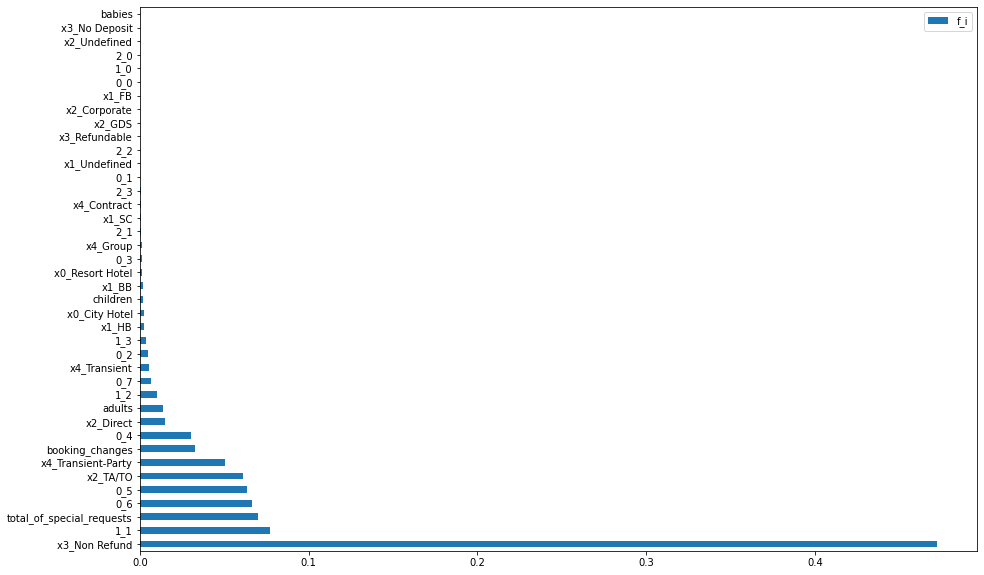

In [96]:
feautre_importances.plot(kind = "barh", figsize = (15,10))

## Using Machine Learning

In [ ]:
import pickle

In [ ]:
file_name = 'hotel_model.sav'

pickle.dump(estimator, open (file_name, 'vb'))

In [ ]:
hotel_pred = pd.DataFrame({
    'hotel' : ['Resort_Hotel'],
    'adults' : [3],
    'children' : [0],
    'babies' : [0],
    'meal' : ['HB'],
    'country' : ['FRA'],
    'market_segment' : ['Offline TA/TO'],
    'distribution_channel' : ['C'],
    'booking_changes' : [2],
    'deposit_type' : ['Deposit'],
    'customer_type' : ['Transient'],
    'total_of_special_request' : [0]
})

In [ ]:
loaded_model.predict(hotel_pred)

In [ ]:
loaded_model.predict_proba(hotel_pred)